# PHYS591000 in 2022
# Lab 05
---
## Goal 
In lab 05, you will practice supervised learning and compare with unsupervised learning in lab 04  
* Decision Tree (DT)  
* Random Forest  
* Support Vector Machine (SVM)  

---
## Supervised learning
* We will use the data of the different star to be example.(same as lab 04 but with preprocessing)  
* We will learn the method of DT, Random Forests and SVM.  
* Try to visulize the result and check the performance of the model.  
* Compare the difference of models and results.

> **Useful Reference**
> 1. [Introduction to boosted decision trees](https://indico.fnal.gov/event/15356/contributions/31377/attachments/19671/24560/DecisionTrees.pdf)
> 2. [Decision tree](https://en.wikipedia.org/wiki/Decision_tree)
> 3. [Understanding Random Forests Classifiers in Python](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)
> 4. [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
> 5. [Support Vector Machine — Introduction to Machine Learning Algorithms](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)
> 6. [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)  

---
## Data Introduction  
[c2d project](https://irsa.ipac.caltech.edu/data/SPITZER/C2D/index.html)  
* x_data : 16 features
	* 0~7 : spectrum energy distribution (SED) for J, H, K, IRAC1, IRAC2, IRAC3, IRAC4, MIPS1.
	* 8~15 : detection error for J, H, K, IRAC1, IRAC2, IRAC3, IRAC4, MIPS1.

* y_data : one-hot labels (0: star, 1: galaxy, 2: young stellar object).
---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-2022-week05/c2d_yso_lab.pickle


## Lab 5
---

# DT

### 1.1  
* Load the pickle file `/kaggle/input/phys591000-2022-week04/c2d_yso_lab.pickle`.  
* Split data in x_train, x_test, y_train, y_test.  
* Print the data structure of x_train, x_test, y_train, y_test.  
* Turn y_train, y_test to 1-D array from one-hot representation.  
* Print the data structure(shape) and length of y_train, y_test after turning.  
* Hint: You have to import the useful packages yourself

[Ref: pickle.load](https://docs.python.org/3/library/pickle.html)  
[Ref: np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)  
[Ref: np.shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html)  

In [2]:
##############################################################################
# Code for 1.1
##############################################################################
# Please code in this cell
import pickle

# loading the pickle file
file = open('/kaggle/input/phys591000-2022-week05/c2d_yso_lab.pickle','rb')
rawdata = pickle.load(file)
x_train = rawdata['x_train']
x_test  = rawdata['x_test']
y_train = rawdata['y_train']
y_test  = rawdata['y_test']

# print the shape of them
print(f'x_train.shape = {x_train.shape}')
print(f'x_test.shape = {x_test.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape = {y_test.shape}')

# convert one hot code to 1D
y_train = np.argmax(y_train,axis=1)
y_test  = np.argmax(y_test,axis=1)
print('After turning')
print(f'The length of y_train is = {len(y_train)}')
print(f'The shape of y_train is = {y_train.shape}')
print(f'The length of y_train is = {len(y_test)}')
print(f'The shape of y_train is = {y_test.shape}')
##############################################################################

x_train.shape = (1836, 16)
x_test.shape = (460, 16)
y_train.shape = (1836, 3)
y_test.shape = (460, 3)
After turning
The length of y_train is = 1836
The shape of y_train is = (1836,)
The length of y_train is = 460
The shape of y_train is = (460,)


### 1.2  
* Build up a decision tree model with depth=5 (set max_depth=5).  
* Train your model with x_train, y_train(label encoding).  
* Print out the training score and testing score.  
* Visualize the tree structure.  
* Hint: feature_name = ['J','H','K','IRAC1','IRAC2','IRAC3','IRAC4','MIPS1','J_err','H_err','K_err','IRAC1_err','IRAC2_err','IRAC3_err','IRAC4_err','MIPS1_err'] , classes = ['star','galaxy','yso']

[Ref: sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
[Ref: sklearn.tree.DecisionTreeClassifier.fit](TBA)  
[Ref: matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)  
[Ref: plt.subplot](TBA)
[Ref: sklearn.tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)  
[Ref: sklearn.tree.DecisionTreeClassifier.score](TBA)  

Performance on training data: 0.9803921568627451
Performance on test data: 0.9608695652173913


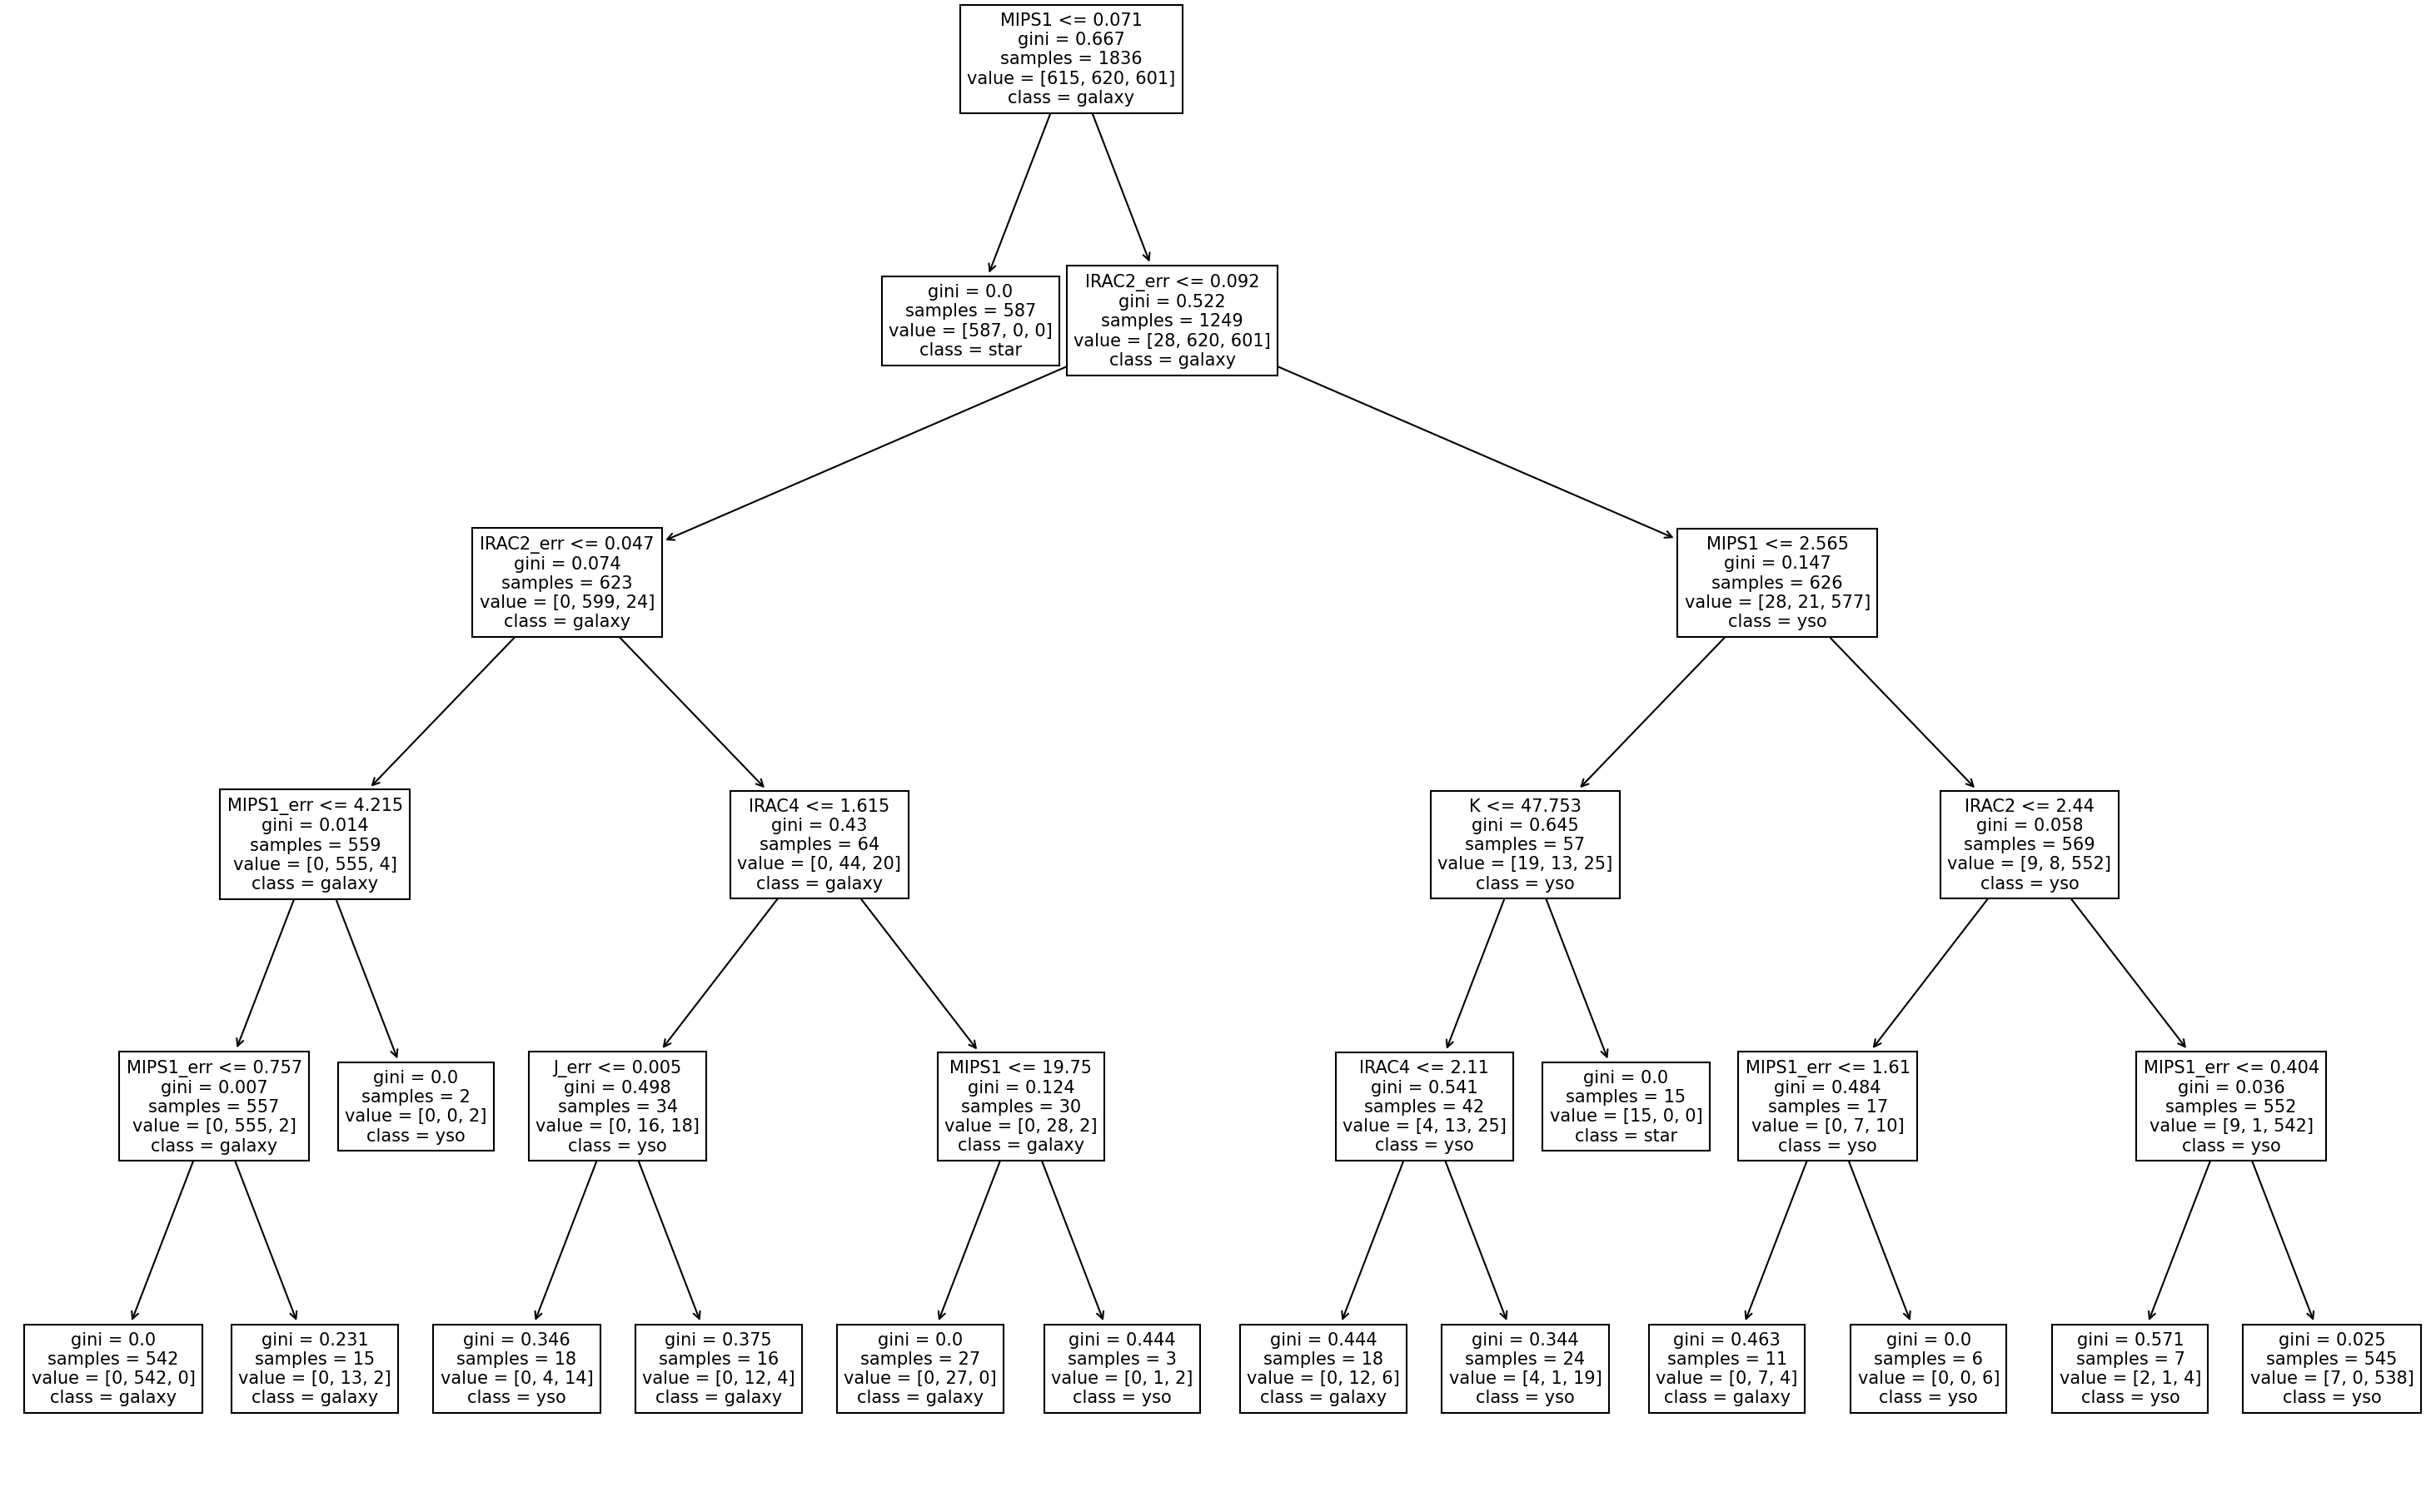

In [3]:
##############################################################################
#Code for 1.2
##############################################################################
# Please code in this cell

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(x_train , y_train)

# Score of Decision Tree 
print ('Performance on training data:', dtree.score(x_train, y_train))
print ('Performance on test data:', dtree.score(x_test, y_test))

# Compare the prediction and the ground truth using x_test
y_pred = dtree.predict(x_test)

fig, ax = plt.subplots(figsize=(12,8), dpi=150)
plot_tree(dtree, feature_names=['J','H','K','IRAC1','IRAC2','IRAC3','IRAC4','MIPS1',
                                'J_err','H_err','K_err','IRAC1_err','IRAC2_err','IRAC3_err','IRAC4_err','MIPS1_err'],
                                class_names = ['star','galaxy','yso'],
          fontsize=10)
plt.show()
##############################################################################

### 1.3  
* Use the decision tree model in 1.2 to predict `x_test` and get `y_pred`.  
* Plot a confusion matrix.  
* Visualize the prediction of feature 7 and 12 by setting xlim=(-10,100), ylim=(-1,5).  

[Ref: sklearn.tree.DecisionTreeClassifier.predict](TBA)  
[Ref: sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[Ref: matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)  
[Ref: plt.matshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html)  
[Ref: plt.text](TBA)  
[Ref: plt.colorbar](TBA)  
[Ref: plt.show](TBA)  
[Ref: plt.subplots](TBA)  
[Ref: plt.scatter](TBA)  
[Ref: plt.title](TBA)  
[Ref: plt.legend](TBA)  
[Ref: ax.tick_params](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)  

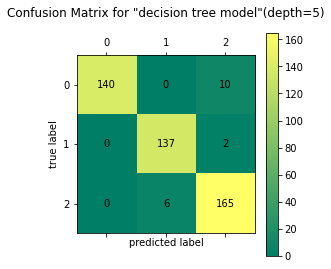

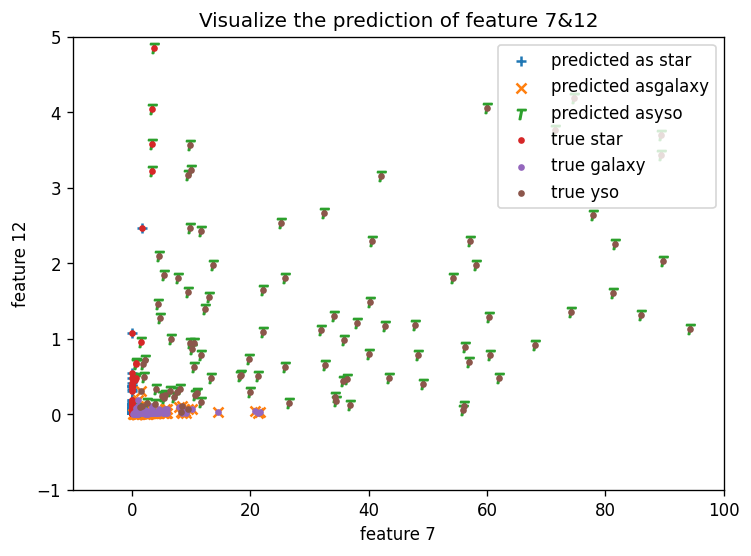

In [4]:
##############################################################################
#Code for 1.3
##############################################################################
# Please code in this cell
from sklearn.metrics import confusion_matrix

# Compare the prediction and the ground truth using x_test
y_pred = dtree.predict(x_test)

# confusion
conf_mat=confusion_matrix(y_test,y_pred)

plt.matshow(conf_mat,cmap='summer')
plt.title('Confusion Matrix for \"decision tree model\"(depth=5)\n')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.colorbar()
for i in range(3):
    for j in range(3):
        c = conf_mat[j,i]
        plt.text(i, j, str(c), va='center', ha='center',c='k')
plt.show()

fig = plt.figure(figsize=(7,5), dpi=120)
plt.title('Visualize the prediction of feature 7&12')

plt.scatter(x_test[:,7][y_pred==0],x_test[:,12][y_pred==0],marker='+', label='predicted as star')
plt.scatter(x_test[:,7][y_pred==1],x_test[:,12][y_pred==1],marker='x', label='predicted asgalaxy')
plt.scatter(x_test[:,7][y_pred==2],x_test[:,12][y_pred==2],marker='$T$', label='predicted asyso')
plt.scatter(x_test[:,7][y_test==0],x_test[:,12][y_test==0],marker='.', label='true star')
plt.scatter(x_test[:,7][y_test==1],x_test[:,12][y_test==1],marker='.', label='true galaxy')
plt.scatter(x_test[:,7][y_test==2],x_test[:,12][y_test==2],marker='.', label='true yso')

plt.xlabel('feature 7')
plt.ylabel('feature 12')
plt.xlim(-10,100)
plt.ylim(-1,5)
plt.legend(loc='upper right')

plt.show()


##############################################################################

### 1.4  
* Rebuild the model without setting depth.  
* Train and test the model.  
* Print out the training score and testing score.  

[Ref: sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
[Ref: sklearn.tree.DecisionTreeClassifier.fit](TBA)  
[Ref: sklearn.tree.DecisionTreeClassifier.score](TBA)  

In [5]:
##############################################################################
#Code for 1.4
##############################################################################
# Please code in this cell

d_tree = DecisionTreeClassifier()
d_tree.fit(x_train , y_train)

# Score of Decision Tree 
print ('Performance on training data (without setting depth):', d_tree.score(x_train, y_train))
print ('Performance on test data (without setting depth):', d_tree.score(x_test, y_test))

##############################################################################

Performance on training data (without setting depth): 1.0
Performance on test data (without setting depth): 0.9652173913043478


* Check the layer number in 1.4 by visulize the tree structure.  
    * Should be 10 layers.  

In [6]:
feature_name = ['J','H','K','IRAC1','IRAC2','IRAC3','IRAC4','MIPS1','J_err','H_err','K_err','IRAC1_err','IRAC2_err','IRAC3_err','IRAC4_err','MIPS1_err']
classes = ['star','galaxy','yso']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,8), dpi=300)
plot_tree(d_tree,feature_names = feature_name, class_names = classes, filled=True, fontsize=12)
plt.show()

### 1.5  
* Use the decision tree model in 1.4 to predict `x_test` and get `y_pred`.  
* Plot a confusion matrix.  
* Visualize the prediction of feature 7 and 12 by setting xlim=(-10,100), ylim=(-1,5).  

[Ref: sklearn.tree.DecisionTreeClassifier.predict](TBA)  
[Ref: sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[Ref: matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)  
[Ref: plt.matshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html)  
[Ref: plt.text](TBA)  
[Ref: plt.colorbar](TBA)  
[Ref: plt.show](TBA)  
[Ref: plt.subplots](TBA)  
[Ref: plt.scatter](TBA)  
[Ref: plt.title](TBA)  
[Ref: plt.legend](TBA)  
[Ref: ax.tick_params](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)  

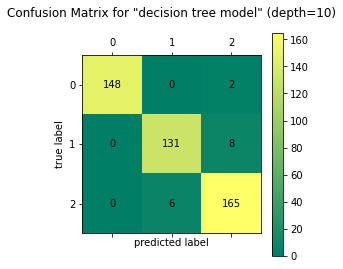

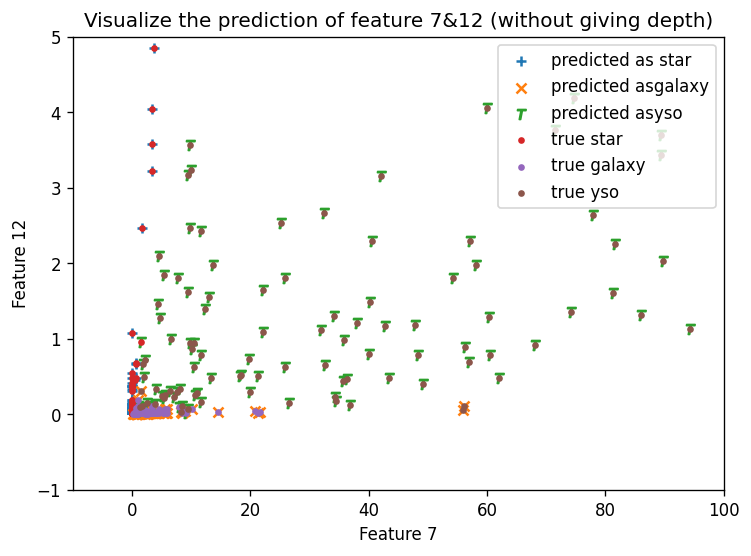

1.0


In [7]:
##############################################################################
#Code for 1.5
##############################################################################
# Please code in this cell

# Compare the prediction and the ground truth using x_test
y_pred = d_tree.predict(x_test)

# confusion
conf_mat=confusion_matrix(y_test,y_pred)

plt.matshow(conf_mat,cmap='summer')
plt.title('Confusion Matrix for \"decision tree model\" (depth=10)\n')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.colorbar()
for i in range(3):
    for j in range(3):
        c = conf_mat[j,i]
        plt.text(i, j, str(c), va='center', ha='center',c='k')
plt.show()

fig = plt.figure(figsize=(7,5), dpi=120)
plt.title('Visualize the prediction of feature 7&12 (without giving depth)')

plt.scatter(x_test[:,7][y_pred==0],x_test[:,12][y_pred==0],marker='+', label='predicted as star')
plt.scatter(x_test[:,7][y_pred==1],x_test[:,12][y_pred==1],marker='x', label='predicted asgalaxy')
plt.scatter(x_test[:,7][y_pred==2],x_test[:,12][y_pred==2],marker='$T$', label='predicted asyso')
plt.scatter(x_test[:,7][y_test==0],x_test[:,12][y_test==0],marker='.', label='true star')
plt.scatter(x_test[:,7][y_test==1],x_test[:,12][y_test==1],marker='.', label='true galaxy')
plt.scatter(x_test[:,7][y_test==2],x_test[:,12][y_test==2],marker='.', label='true yso')

plt.xlabel('Feature 7')
plt.ylabel('Feature 12')
plt.xlim(-10,100)
plt.ylim(-1,5)
plt.legend(loc='upper right')

plt.show()
print(d_tree.score(x_train,y_train))
##############################################################################

### 1.6  
Discussion for 1.2 to 1.5
* Will a deeper model get a better performance?
* Hint: Please compare the confusion matrixs and the scores.
---
Please write your discussion in this cell:<br>
樹的深度會稍微影響 dicision tree 的優劣，如果沒有指定深度時，演算法會把訓練用資料分到每個類別中都是相同的資料為止。樹的深度越深，分類的條件越多，理論上會分得比較好，但這僅限於訓練用的資料，不見得對測試用的資料也成立。因此，我們認為隨著深度增加可以稍微提高分類精準度，但隨著深度提高，分類的精準度會到達一個上限。

# Random Forest

### 2.1  
* Build up a randomforest model.(set n_estimators=100,max_depth=5)  
* Train your model with x_train, y_train(label encoding).  
* Predict `x_test` and get `y_pred`.  
* Print out the accuracy between y_test(label encoding) and y_pred. 
* Plot a confusion matrix.   
* Visualize the prediction of feature 7 and 12 by setting xlim=(-10,100), ylim=(-1,5).  

[Ref: sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  
[Ref: sklearn.ensemble.RandomForestClassifier.fit](TBA)  
[Ref: sklearn.ensemble.RandomForestClassifier.predict](TBA)  
[Ref: sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)  
[Ref: sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[Ref: matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)  
[Ref: plt.matshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html)  
[Ref: plt.text](TBA)  
[Ref: plt.colorbar](TBA)  
[Ref: plt.show](TBA)  
[Ref: plt.subplots](TBA)  
[Ref: plt.scatter](TBA)  
[Ref: plt.title](TBA)  
[Ref: plt.legend](TBA)  
[Ref: ax.tick_params](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)  

accuracy of random forest is: 0.9739130434782609


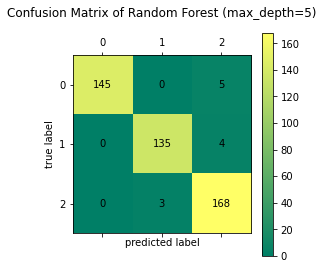

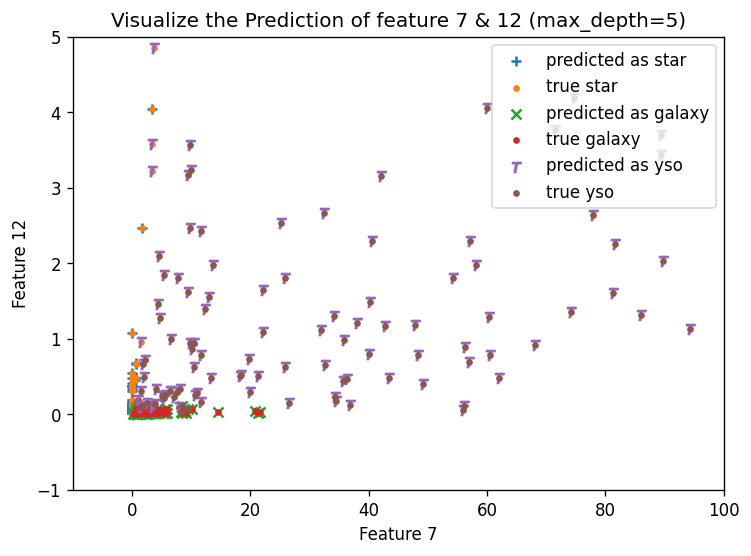

In [8]:
##############################################################################
#Code for 2.1
##############################################################################
# Please code in this cell
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#build random forest
rforest = RandomForestClassifier(n_estimators=100,max_depth=5)
rforest.fit(x_train , y_train)
y_pred=rforest.predict(x_test)

#print accuracy
print('accuracy of random forest is:', accuracy_score(y_test , y_pred))

#print confusion matrix
conf_mat_rforest=confusion_matrix(y_test,y_pred)

plt.matshow(conf_mat_rforest,cmap='summer')
plt.colorbar()
plt.title('Confusion Matrix of Random Forest (max_depth=5)\n')
plt.xlabel('predicted label')
plt.ylabel('true label')
for i in range(3):
    for j in range(3):
        c = conf_mat_rforest[j,i]
        plt.text(i, j, str(c), va='center', ha='center',c='k')
plt.show()

#print feature 7 vs 12 with result of random forest
marker=['+','x','$T$']
label=['star','galaxy','yso'] #想偷懶用的東西
fig = plt.figure(figsize=(7,5), dpi=120)
plt.title('Visualize the Prediction of feature 7 & 12 (max_depth=5)')
for i in range(3):
    plt.scatter(x_test[:,7][rforest.predict(x_test)==i],x_test[:,12][rforest.predict(x_test)==i],marker=marker[i],label='predicted as {}'.format(label[i]))
    plt.scatter(x_test[:,7][y_test==i],x_test[:,12][y_test==i],marker='.',label='true {}'.format(label[i]))

plt.axis([-10,100,-1,5])
plt.xlabel('Feature 7')
plt.ylabel('Feature 12')
plt.legend(loc='upper right')
plt.show()
###############r###############################################################

### 2.2  
* Rebuild a randomforest model without setting depth.(set n_estimators=100)  
* Train your model with x_train, y_train(label encoding).  
* Predict `x_test` and get `y_pred`.  
* Print out the accuracy between y_test(label encoding) and y_pred.  
* Plot a confusion matrix.   
* Visualize the prediction of feature 7 and 12 by setting xlim=(-10,100), ylim=(-1,5).  

[Ref: sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  
[Ref: sklearn.ensemble.RandomForestClassifier.fit](TBA)  
[Ref: sklearn.ensemble.RandomForestClassifier.predict](TBA)  
[Ref: sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)  
[Ref: sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[Ref: matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)  
[Ref: plt.matshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html)  
[Ref: plt.text](TBA)  
[Ref: plt.colorbar](TBA)  
[Ref: plt.show](TBA)  
[Ref: plt.subplots](TBA)  
[Ref: plt.scatter](TBA)  
[Ref: plt.title](TBA)  
[Ref: plt.legend](TBA)  
[Ref: ax.tick_params](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)  

accuracy of random forest is: 0.9826086956521739


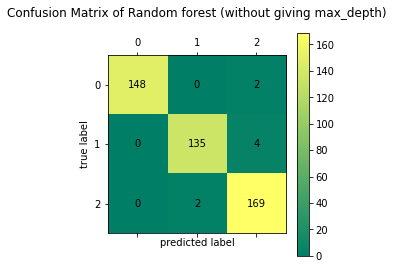

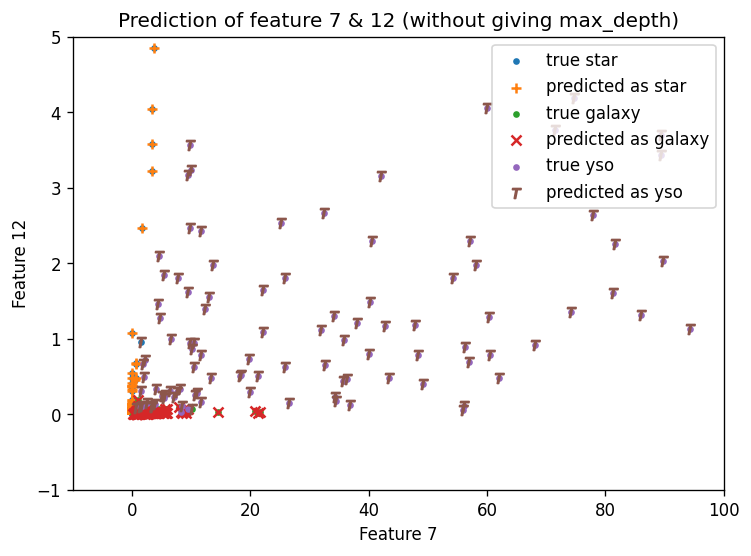

In [9]:
##############################################################################
#Code for 2.2
##############################################################################
# Please code in this cell

#build random forest
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(x_train , y_train)
y_pred=rforest.predict(x_test)

#print accuracy
print('accuracy of random forest is:', accuracy_score(y_test , y_pred))

#print confusion matrix
conf_mat_rforest=confusion_matrix(y_test,y_pred)
plt.matshow(conf_mat_rforest,cmap='summer')
plt.colorbar()
plt.title('Confusion Matrix of Random forest (without giving max_depth)\n')
plt.xlabel('predicted label')
plt.ylabel('true label')
for i in range(3):
    for j in range(3):
        plt.text(i, j, str(conf_mat_rforest[j,i]), va='center', ha='center',c='k')
plt.show()

#print feature 7 vs 12 with result of random forest
label=['star','galaxy','yso'] #想偷懶用的東西
marker=['+','x','$T$']
fig = plt.figure(figsize=(7,5), dpi=120)
for i in range(3):
    plt.scatter(x_test[:,7][y_test==i],x_test[:,12][y_test==i],marker='.',label='true {}'.format(label[i]))
    plt.scatter(x_test[:,7][rforest.predict(x_test)==i],x_test[:,12][rforest.predict(x_test)==i],marker=marker[i],label='predicted as {}'.format(label[i]))
plt.axis([-10,100,-1,5])
plt.xlabel('Feature 7')
plt.ylabel('Feature 12')
plt.legend(loc='upper right')
plt.title('Prediction of feature 7 & 12 (without giving max_depth)')
plt.show()

##############################################################################

### 2.3  
Discussion for 2.1 to 2.2
* Will a deeper model get a better performance?
* Hint: Please compare the confusion matrixs and the accuracy.
---
Please write your discussion in this cell:<br>
在1.6時提過了，樹的深度可以提高分類精準度，同樣的，對random forest來說也有類似的情形，我們的程式也有得到這樣的結果。此外，因為random 相較於單純的 decision tree 來說，他不會一次直接將測試用的資料分類，而是將測試資料隨機分成幾組，每組得到一種分類方式，再將這些分類方法平均，因此比較不像decision tree會出現對訓練的資料分類的很好，但不見得適用在測試資料上，我們的程式也驗證了這件事情。

# SVM

### 3.1  
* Build up SVM.
* Train the model with x_train, y_train(label encoding).

[Ref: sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [10]:
##############################################################################
# Code for 3.1
##############################################################################
# Please code in this cell
from sklearn import svm

# Training with SVM with a linear kernal  C= regularization parameter
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(x_train, y_train)



##############################################################################

SVC(kernel='linear')

## 3.2  
* Print out the training score.  
* Print out the testing score.  
* Get the model prediction for x_test.  
* Create a confusion matrix for y_test(label encoding) and y_pred.(see the sturcture and visualize with figure)  
* Visualize the prediction of feature 7 and 12 by setting xlim=(-10,100), ylim=(-1,5).  

[Ref: sklearn.SVC.score](TBA)  
[Ref: sklearn.SVC.predict](TBA)  
[Ref: sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[Ref: matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)  
[Ref: plt.matshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html)  
[Ref: plt.text](TBA)  
[Ref: plt.colorbar](TBA)  
[Ref: plt.show](TBA)  
[Ref: plt.subplots](TBA)  
[Ref: plt.scatter](TBA)  
[Ref: plt.title](TBA)  
[Ref: plt.legend](TBA)  
[Ref: ax.tick_params](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)  

SVC score (training) is: 0.9798474945533769
SVC score (testing) is: 0.9826086956521739
shape of y_pred is: (460,)


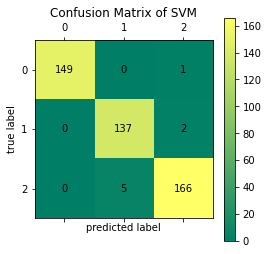

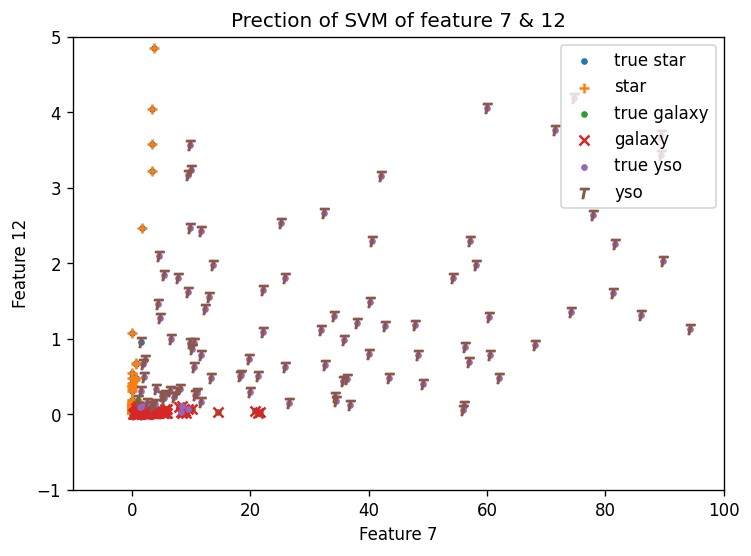

In [11]:
##############################################################################
# Code for 3.2
##############################################################################
# Please code in this cell

#print traing and testing score
print('SVC score (training) is:',clf.score(x_train,y_train))
print('SVC score (testing) is:',clf.score(x_test,y_test))

#print structure of y_pred
y_pred=clf.predict(x_test)
print('shape of y_pred is:',np.shape(y_pred))

#plot confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
plt.matshow(conf_mat,cmap='summer')
plt.colorbar()
plt.title('Confusion Matrix of SVM')
plt.xlabel('predicted label')
plt.ylabel('true label')
for i in range(3):
    for j in range(3):
        plt.text(i, j, str(conf_mat[j,i]), va='center', ha='center',c='k')
plt.show()

#plot feature 7 vs 12 with result of SVM
label=['star','galaxy','yso'] #想偷懶用的東西

fig = plt.figure(figsize=(7,5), dpi=120)
for i in range(3):
    plt.scatter(x_test[:,7][y_test==i],x_test[:,12][y_test==i],marker='.',label='true {}'.format(label[i]))
    plt.scatter(x_test[:,7][y_pred==i],x_test[:,12][y_pred==i],marker=marker[i],label=label[i])
plt.axis([-10,100,-1,5])
plt.xlabel('Feature 7')
plt.ylabel('Feature 12')
plt.legend(loc='upper right')
plt.title('Prection of SVM of feature 7 & 12')
plt.show()
##############################################################################F

# Discussion

Discussion the method of unsupervised and supervised.  
* Compare the methods in lab 04 and lab 05.  
* Describe the difference of them.(EX: compare their results)  
* Discribe how to choose which methods to use.  
---
Please write your discussion in this cell:<br>
對非監督式學習來說，因為不需要給出正確的分類資訊，所以對人來說比較省事，但缺點也很明顯：如果資料分布的狀況不適用這種演算法，就會被分的一蹋糊塗，像上次的KMean就很不適合分類這筆資料，因此他的判斷跟實際上的類別完全不一樣。而對監督事學習來說，因為要事先給出正確的分類資訊，對人來說會需要多一個步驟，但同樣的也比較不會發生錯誤率很高的狀況。此外，我們認為挑選演算法時應該要根據資料分布的形式決定，因為每個演算法都有自己擅長的地方。如果已經知道資料分布的規則，那挑選適合的非監督式學習算法可以剩下很多訓練的時間，反之，如果資料分佈的規則比較不固定，或是不熟悉不同機器學習的差異，那選擇監督式學習可以得到較高的精確度。

# Bonus  
* Identify the importance of features in data input by DT  
* Plot out by bar chart.  

It is commonly said that the decision-making process of machine learning is unclear, but some model has more interpretability than others.  
In this lab, we use 16 features as input and decide data type. In 16 features, some of them are more important to others, that is, the model basically uses them to do the judgement.  

[Ref: sklearn.tree.DecisionTreeClassifier.feature_importances_](TBA)  
[Ref: plt.bar](TBA)  
[Ref: plt.show](TBA)  

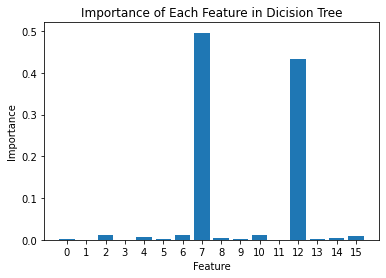

In [12]:
##############################################################################
#Code for bounus
##############################################################################
# Please code in this cell
importance=d_tree.feature_importances_
plt.bar(range(16),importance)
plt.xticks(range(16))
plt.title('Importance of Each Feature in Dicision Tree')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
##############################################################################